Assignment Code: DA-AG-015

#Boosting Techniques | Assignment

#Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners.

Boosting is an **ensemble learning technique** in machine learning that combines multiple **weak learners** to create a **stronger predictive model**. A weak learner is a model that performs slightly better than random guessing. Boosting sequentially trains these weak learners, with each new model focusing on the mistakes made by the previous ones.

Here’s a step-by-step explanation of how it works and improves weak learners:

1. **Start with a weak learner**:
   Typically, a simple model like a shallow decision tree (also called a “stump”) is trained on the data. This model may have limited accuracy but captures some patterns.

2. **Identify errors**:
   After the first model makes predictions, Boosting identifies the data points that were misclassified or predicted poorly.

3. **Increase focus on difficult cases**:
   The next weak learner is trained to **pay more attention to the errors** of the previous model. In practice, this is done by giving higher weights to misclassified examples, so the new model focuses on correcting them.

4. **Sequential combination**:
   This process is repeated for many weak learners. Each learner tries to improve on the errors of the ensemble so far.

5. **Weighted voting or prediction**:
   In the end, all the weak learners are combined into a single strong model. Usually, the predictions are weighted based on each learner’s accuracy, so better learners contribute more.

### How Boosting Improves Weak Learners

* **Error correction**: Each new learner compensates for the weaknesses of the previous ones.
* **Focus on hard cases**: Difficult-to-predict data points get more attention over iterations.
* **Reduced bias**: Combining many weak learners often produces a model with much lower bias than individual learners.

### Popular Boosting Algorithms

* **AdaBoost**: Adjusts weights of misclassified examples and combines learners via weighted voting.
* **Gradient Boosting**: Trains each new learner to predict the residual errors of the current ensemble.
* **XGBoost / LightGBM / CatBoost**: Optimized, faster, and more regularized versions of gradient boosting.

---

# Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

The main difference between **AdaBoost** and **Gradient Boosting** lies in **how each new model is trained to correct the errors of the previous models**. Both are boosting methods, but their mechanisms differ:

### **1. AdaBoost (Adaptive Boosting)**

* **Error-focused weighting**:
  AdaBoost adjusts the **weights of the training examples** after each iteration. Misclassified examples get higher weights so that the next weak learner focuses more on them.

* **Training approach**:
  Each weak learner is trained **independently** on the weighted dataset. The algorithm does not explicitly minimize a loss function; it emphasizes correcting past mistakes.

* **Combination of learners**:
  Each learner’s vote is weighted based on its accuracy: better-performing learners contribute more to the final prediction.

* **Intuition**:
  “Focus on the mistakes of the previous learner by giving them more importance.”

### **2. Gradient Boosting**

* **Error-focused prediction (residuals)**:
  Gradient Boosting trains each new learner to **predict the residual errors** (the difference between actual values and predictions) of the current ensemble.

* **Training approach**:
  Each learner is trained **sequentially to minimize a loss function** (like MSE for regression or log-loss for classification) using gradient descent. This is why it’s called “gradient” boosting.

* **Combination of learners**:
  Learners are added to the ensemble with a learning rate that scales their contribution to reduce overfitting.

* **Intuition**:
  “Learn the gradient of the loss function to correct the errors of the ensemble step by step.”

### **Key Differences in Training**

| Feature                | AdaBoost                         | Gradient Boosting                                                     |
| ---------------------- | -------------------------------- | --------------------------------------------------------------------- |
| How errors are handled | Reweights misclassified examples | Learns to predict residuals (gradients)                               |
| Focus                  | Misclassified samples            | Loss minimization                                                     |
| Learner weighting      | Based on accuracy                | Learning rate controls contribution                                   |
| Algorithm style        | Sequential, adaptive weighting   | Sequential, gradient descent optimization                             |
| Flexibility            | Mostly for classification        | Works for both classification and regression; flexible loss functions |

---

#Question 3: How does regularization help in XGBoost?

In **XGBoost**, regularization plays a key role in **controlling model complexity** and **preventing overfitting**, which is especially important because boosting builds many trees sequentially that can easily overfit the training data.

Here’s how it works:

### **1. Regularization in XGBoost**

XGBoost includes **explicit regularization terms** in its objective function:

$$
\text{Obj} = \text{Loss}(y, \hat{y}) + \Omega(f)
$$

Where:

* $\text{Loss}(y, \hat{y})$ is the prediction error (e.g., mean squared error for regression).
* $\Omega(f)$ is the regularization term for the tree model $f$.

The regularization term is defined as:

$$
\Omega(f) = \gamma T + \frac{1}{2} \lambda \sum_{j=1}^{T} w_j^2
$$

Where:

* $T$ = number of leaves in the tree
* $w_j$ = score (weight) of leaf $j$
* $\gamma$ = penalty for adding an extra leaf (controls tree size)
* $\lambda$ = L2 regularization on leaf weights (shrinks weights)

### **2. How Regularization Helps**

1. **Prevents overfitting**

   * Penalizes overly complex trees with too many leaves.
   * Limits large leaf weights that could overreact to training data noise.

2. **Controls tree complexity**

   * $\gamma$ discourages unnecessary splits.
   * $\lambda$ encourages smaller weights, making predictions smoother.

3. **Improves generalization**

   * By balancing fit (loss minimization) with complexity, XGBoost produces models that perform better on unseen data.

4. **Supports tuning flexibility**

   * Users can adjust `gamma` and `lambda` to find the optimal trade-off between bias and variance.

---

#Question 4: Why is CatBoost considered efficient for handling categorical data?

CatBoost is considered efficient for handling categorical data because it **natively processes categorical features** without requiring extensive preprocessing like one-hot encoding or label encoding, which are commonly used in other gradient boosting frameworks. Here’s why it works so well:

### **1. Native Categorical Handling**

* CatBoost can directly accept categorical features as input.
* It uses a method called **“ordered target statistics”** (or target encoding) to convert categories into numerical representations based on the target variable.
* This avoids creating a huge number of dummy variables, which can slow down training and increase memory usage.

### **2. Ordered Target Statistics**

* Instead of using the global mean of the target for encoding (which can cause **target leakage**), CatBoost calculates the mean **in an ordered, iterative manner**.
* For example, when encoding a row, it only uses the previous rows in the dataset to compute the statistic, ensuring that the model does not “peek” at the target for the current row.

### **3. Efficient Handling of High Cardinality**

* Categories with many unique values (like ZIP codes or product IDs) are handled efficiently because CatBoost doesn’t explode the feature space like one-hot encoding would.
* It reduces memory usage and improves training speed without sacrificing accuracy.

### **4. Built-in Feature Combinations**

* CatBoost can automatically generate **combinations of categorical features** that are likely to improve predictive power, without manually engineering interaction features.

### **5. GPU Optimization**

* CatBoost is optimized to train on both CPU and GPU efficiently, including for datasets with large categorical features.

---

# Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?

Datasets:

● Use sklearn.datasets.load_breast_cancer() for classification tasks.

● Use sklearn.datasets.fetch_california_housing() for regression
tasks.

#Answer:

Here’s a practical perspective on **real-world applications where boosting is preferred over bagging**, illustrated with **examples using the datasets you mentioned**.

## **1. Classification Task: Breast Cancer Diagnosis**

**Dataset:** `sklearn.datasets.load_breast_cancer()`

* **Problem type:** Binary classification (malignant vs benign tumors)
* **Why boosting is preferred:**

  * Boosting sequentially focuses on misclassified tumor samples, improving sensitivity to the harder-to-classify cases (e.g., tumors with ambiguous features).
  * Reduces bias, which is crucial in medical diagnostics where misclassification can be critical.

**Example boosting models:**

* **AdaBoostClassifier**: Uses weak decision stumps to focus on difficult-to-classify tumors.
* **GradientBoostingClassifier / XGBoost / CatBoost**: Optimizes loss and handles feature interactions automatically.

**Real-world analog:**

* Predicting cancer malignancy from patient histopathology or imaging features, where each patient case may have subtle variations.

## **2. Regression Task: California Housing Prices**

**Dataset:** `sklearn.datasets.fetch_california_housing()`

* **Problem type:** Regression (predict median house value from features like location, income, rooms, etc.)
* **Why boosting is preferred:**

  * Boosting reduces bias and sequentially corrects underpredicted or overpredicted house values.
  * Captures complex nonlinear relationships between features (e.g., geography, income, population density) that simple bagging may underfit.

**Example boosting models:**

* **GradientBoostingRegressor**: Minimizes residuals iteratively.
* **XGBoost / LightGBM / CatBoost**: Efficient on large datasets with mixed feature types and can handle high cardinality features.

**Real-world analog:**

* Real estate price prediction or property valuation platforms, where small improvements in prediction accuracy directly impact decision-making.

### **Why Boosting Beats Bagging in These Cases**

| Aspect             | Breast Cancer Classification                   | California Housing Regression                      |
| ------------------ | ---------------------------------------------- | -------------------------------------------------- |
| Goal               | Detect subtle malignant cases                  | Predict complex price patterns                     |
| Challenge          | Hard-to-classify tumors                        | Nonlinear feature interactions                     |
| Boosting advantage | Focuses on misclassified samples; reduces bias | Reduces bias; fits residual errors iteratively     |
| Bagging limitation | Might not correct bias in subtle cases         | Averaging many trees may underfit complex patterns |

---

#Question 6: Write a Python program to:

● Train an AdaBoost Classifier on the Breast Cancer dataset

● Print the model accuracy

In [ ]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AdaBoost classifier
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the model
adaboost_model.fit(X_train, y_train)

# Make predictions
y_pred = adaboost_model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy: {accuracy:.4f}")

AdaBoost Classifier Accuracy: 0.9737


#Question 7:  Write a Python program to:

● Train a Gradient Boosting Regressor on the California Housing dataset

● Evaluate performance using R-squared score

In [ ]:
# Import libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(
    n_estimators=200,      # Number of boosting stages
    learning_rate=0.1,     # Step size shrinkage
    max_depth=3,           # Maximum depth of individual trees
    random_state=42
)

# Train the model
gbr_model.fit(X_train, y_train)

# Make predictions
y_pred = gbr_model.predict(X_test)

# Evaluate performance using R-squared
r2 = r2_score(y_test, y_pred)
print(f"Gradient Boosting Regressor R-squared score: {r2:.4f}")

Gradient Boosting Regressor R-squared score: 0.8004


#Question 8: Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset

● Tune the learning rate using GridSearchCV

● Print the best parameters and accuracy

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load data
X, y = load_breast_cancer(return_X_y=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create XGBoost classifier
xgb = XGBClassifier(random_state=42)

# Define learning rates to test
param_grid = {'learning_rate': [0.01, 0.1, 0.2, 0.3]}

# Grid search
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Results
print("Best parameters:", grid_search.best_params_)
print("Best CV accuracy:", round(grid_search.best_score_, 4))

# Test accuracy
y_pred = grid_search.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", round(test_accuracy, 4))

Best parameters: {'learning_rate': 0.2}
Best CV accuracy: 0.967
Test accuracy: 0.9561


#Question 9: Write a Python program to:
● Train a CatBoost Classifier

● Plot the confusion matrix using seaborn

CatBoost Classifier Accuracy: 0.9737


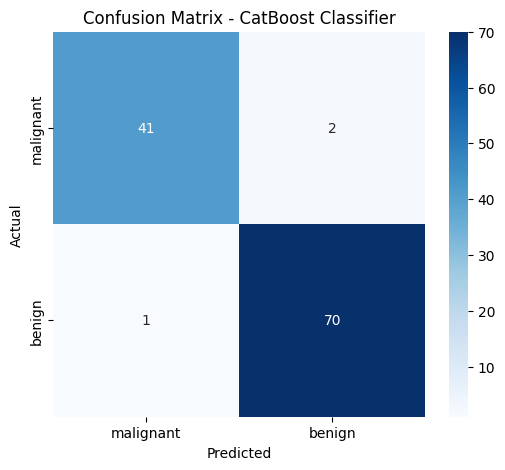

In [ ]:
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoost Classifier
cat_model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=3,
    verbose=0,
    random_state=42
)

# Train model
cat_model.fit(X_train, y_train)

# Predictions (convert to int)
y_pred = cat_model.predict(X_test).astype(int)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"CatBoost Classifier Accuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost Classifier')
plt.show()

#Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and categorical features.

Describe your step-by-step data science pipeline using boosting techniques:

● Data preprocessing & handling missing/categorical values

● Choice between AdaBoost, XGBoost, or CatBoost

● Hyperparameter tuning strategy

● Evaluation metrics you'd choose and why

● How the business would benefit from your model

##Answer:

## **1. Data Preprocessing**

### **a. Handling Missing Values**

* **Numeric features:**

  * Impute missing values using **median** (robust to outliers) or use **iterative imputation**.
* **Categorical features:**

  * Impute with **mode** or a special category like `"Unknown"`.
* Some boosting libraries like **CatBoost** can handle missing values natively, but explicit imputation is often safer.

### **b. Handling Categorical Features**

* **AdaBoost / XGBoost:** Requires numeric encoding:

  * Use **one-hot encoding** for low-cardinality categories.
  * Use **target encoding** or **CatBoost-style encoding** for high-cardinality features.
* **CatBoost:** Can directly handle categorical features without encoding, making it more efficient.

### **c. Feature Scaling**

* Most tree-based boosting models **don’t require scaling**, so you can skip normalization or standardization unless using hybrid models.

### **d. Handling Imbalanced Data**

* **Techniques:**

  * Adjust **class weights** in the loss function (`scale_pos_weight` in XGBoost, `class_weights` in CatBoost).
  * Oversample minority class using **SMOTE** or undersample majority class.
* Boosting naturally emphasizes misclassified examples, which helps with imbalanced datasets.

## **2. Choice of Boosting Algorithm**

| Algorithm | Why Choose It                                                                                 |
| --------- | --------------------------------------------------------------------------------------------- |
| AdaBoost  | Simple, interpretable, good if dataset is small and mostly numeric                            |
| XGBoost   | Efficient, flexible, supports missing values, handles large datasets                          |
| CatBoost  | Best for datasets with **categorical features** and missing values, less preprocessing needed |

**Recommendation:** **CatBoost** is preferred here due to categorical features and missing values. XGBoost is also strong if categorical variables are already encoded.

## **3. Hyperparameter Tuning Strategy**

* **Parameters to tune:**

  * `learning_rate` (step size for boosting)
  * `n_estimators` (number of boosting rounds)
  * `max_depth` (depth of individual trees)
  * `subsample` / `colsample_bytree` (fraction of samples/features per tree)
  * `l2_leaf_reg` (CatBoost regularization)
* **Tuning methods:**

  * **RandomizedSearchCV** for efficiency on large datasets.
  * **GridSearchCV** for smaller parameter spaces.
  * Optionally, **Bayesian optimization** (e.g., Optuna) for more efficient tuning.

## **4. Evaluation Metrics**

* **Due to imbalanced dataset:**

  * **ROC-AUC score:** Measures how well the model separates classes, insensitive to imbalance.
  * **Precision, Recall, F1-score:** Especially important for the minority class (defaults).
  * **Confusion matrix:** Understand false positives vs false negatives.
* **Why not accuracy alone:**

  * A model predicting all “non-default” could have high accuracy but fail to detect real defaults.

## **5. Business Impact**

* **Early identification of risky borrowers:** Allows the company to mitigate losses by adjusting loan terms, collateral, or interest rates.
* **Optimized credit approval:** Reduces defaults while keeping profitable customers.
* **Targeted interventions:** Customers at risk of default can receive reminders or financial support programs.
* **Regulatory compliance:** Accurate and interpretable models help meet lending regulations and risk reporting standards.

### **6. Optional: Pipeline Workflow Summary**

1. **Load data → Handle missing values → Encode categorical variables** (or use CatBoost directly).
2. **Split data into train/test sets → Handle imbalance (weights or SMOTE).**
3. **Train boosting model (CatBoost/XGBoost) → Tune hyperparameters via CV.**
4. **Evaluate using ROC-AUC, F1-score, confusion matrix.**
5. **Deploy model → Monitor predictions and retrain periodically.**
